In [135]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from textblob import Word
from textblob import TextBlob
import seaborn as sns
import plotly.express as px
import re
from textblob import Word

from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)


In [136]:
spotify=pd.read_csv("Dataset/reviews.csv",usecols=["Review","Rating"]) # Reading the dataset and using only the review and rating columns
data=spotify.copy()
data.head()

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  61594 non-null  object
 1   Rating  61594 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 962.5+ KB


pre

In [138]:

data["Review"]=data["Review"].apply(lambda x: re.sub('[^a-z A-Z 0-9-]+', '', x)) #removing special characters
data["Review"]=data["Review"].apply(lambda x: " ".join(x.lower() for x in x.split())) #lowering the text
data["Review"]=data["Review"].apply(lambda x: " ".join(x.split())) #removing extra spaces
data["Review"]=data["Review"].apply(lambda x: re.sub('\d+', '', x)) #removing numbers
data["Review"]=data["Review"].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x))) #removing links
sw=stopwords.words("english")
data["Review"]=data["Review"].apply(lambda x: " ".join(x for x in x.split() if x not in sw)) #removing stopwords
data.head(15)

,Review,Rating
0,great music service audio high quality app eas...,5
1,please ignore previous negative rating app sup...,5
2,pop-up get best spotify experience android ann...,4
3,really buggy terrible use recently,1
4,dear spotify get songs didnt put playlist shuf...,1
5,player controls sometimes disappear reason app...,3
6,love selection lyrics provided song youre list...,5
7,still extremely slow changing storage external...,3
8,great app best mp music app ever used one prob...,5
9,im deleting app following reasons app failing ...,1


In [139]:
# #tokenization and lemmatization
# def tokenization(text):
#     text = re.split('\W+', text)
#     return text
# def lemmatization(text):
#     text = [Word(word).lemmatize() for word in text]
#     return text
# data['Review'] = data['Review'].apply(lambda x: tokenization(x.lower()))
# data['Review'] = data['Review'].apply(lambda x: lemmatization(x))
# data.head()

eda

In [140]:
fig=px.histogram(data,x="Rating",color="Rating",title="Rating Distribution",width=800,height=500)
iplot(fig)

In [141]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [142]:
data["Rating"].replace(1, value="neg",inplace=True)
data["Rating"].replace(2, value="neg",inplace=True)
data["Rating"].replace(3, value="neutral",inplace=True)
data["Rating"].replace(4, value="pos",inplace=True)
data["Rating"].replace(5, value="pos",inplace=True)
data.head()

,Review,Rating
0,great music service audio high quality app eas...,pos
1,please ignore previous negative rating app sup...,pos
2,pop-up get best spotify experience android ann...,pos
3,really buggy terrible use recently,neg
4,dear spotify get songs didnt put playlist shuf...,neg


In [143]:
data["Rating"].value_counts()

pos        29937
neg        24771
neutral     6886
Name: Rating, dtype: int64

In [144]:
fig1=px.histogram(data,x="Rating",color="Rating",title="Rating Distribution",width=800,height=500)
iplot(fig1)

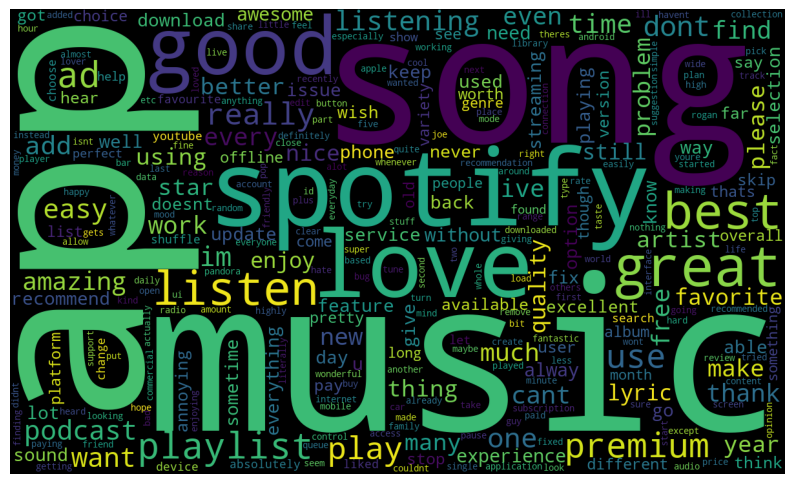

In [145]:
good = data[data['Rating'] == 'pos']['Review']

plt.figure(figsize=(10,10))
wc = WordCloud(max_words=2000, min_font_size=11, height=720, width=1200, collocations=False).generate(' '.join(good))
plt.axis('off')
plt.imshow(wc)

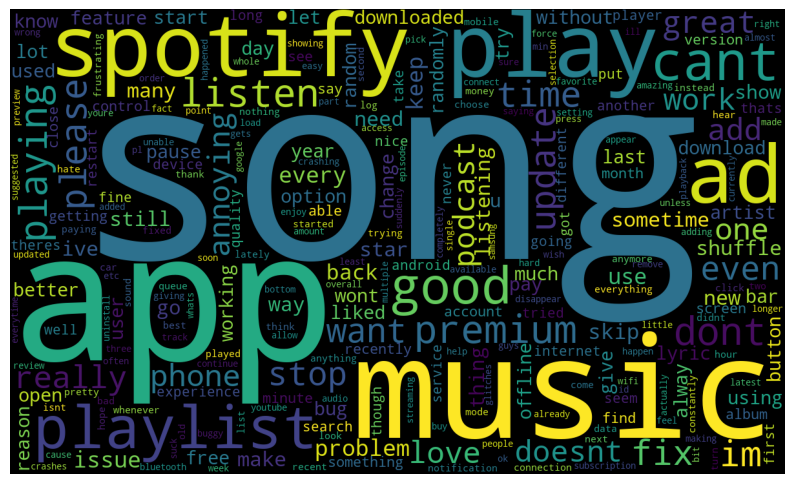

In [146]:
good = data[data['Rating'] == 'neutral']['Review']

plt.figure(figsize=(10,10))
wc = WordCloud(max_words=2000, min_font_size=11, height=720, width=1200, collocations=False).generate(' '.join(good))
plt.axis('off')
plt.imshow(wc)

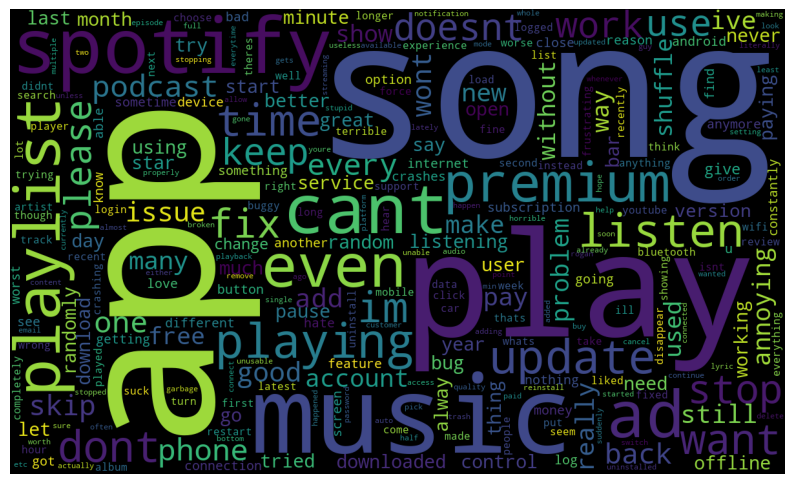

In [147]:
good = data[data['Rating'] == 'neg']['Review']

plt.figure(figsize=(10,10))
wc = WordCloud(max_words=2000, min_font_size=11, height=720, width=1200, collocations=False).generate(' '.join(good))
plt.axis('off')
plt.imshow(wc)

In [148]:
#find common words in positive reviews which are not in negative reviews and neutral reviews
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
get_top_n_words(data[data['Rating'] == 'pos']['Review'], 20)

[('app', 15318),
 ('music', 15295),
 ('spotify', 9282),
 ('love', 7400),
 ('songs', 6907),
 ('good', 5613),
 ('great', 5489),
 ('like', 4600),
 ('best', 4219),
 ('song', 4043),
 ('listen', 4038),
 ('premium', 3283),
 ('ads', 3013),
 ('use', 2987),
 ('really', 2622),
 ('play', 2447),
 ('dont', 2259),
 ('playlist', 2221),
 ('easy', 2099),
 ('one', 2044)]

In [149]:
get_top_n_words(data[data['Rating'] == 'neutral']['Review'], 20)

[('app', 4066),
 ('songs', 2820),
 ('music', 2339),
 ('song', 2243),
 ('spotify', 1909),
 ('play', 1636),
 ('like', 1482),
 ('ads', 1318),
 ('cant', 1288),
 ('good', 1167),
 ('playlist', 1166),
 ('premium', 1108),
 ('dont', 1104),
 ('listen', 1102),
 ('playing', 1079),
 ('please', 969),
 ('im', 950),
 ('fix', 907),
 ('get', 817),
 ('even', 797)]

In [150]:
get_top_n_words(data[data['Rating'] == 'neg']['Review'], 20)

[('app', 16236),
 ('songs', 8507),
 ('song', 8422),
 ('music', 7814),
 ('spotify', 7604),
 ('play', 7238),
 ('cant', 6124),
 ('even', 4641),
 ('premium', 4578),
 ('playing', 4333),
 ('ads', 4191),
 ('listen', 4189),
 ('dont', 3785),
 ('update', 3779),
 ('like', 3687),
 ('im', 3660),
 ('playlist', 3652),
 ('want', 3393),
 ('fix', 3173),
 ('get', 3051)]

In [151]:
data

,Review,Rating
0,great music service audio high quality app eas...,pos
1,please ignore previous negative rating app sup...,pos
2,pop-up get best spotify experience android ann...,pos
3,really buggy terrible use recently,neg
4,dear spotify get songs didnt put playlist shuf...,neg
...,...,...
61589,even though communicated lyrics feature availa...,neg
61590,use sooo good back downloaded free version cou...,neg
61591,app would good taking device start comp theres...,neg
61592,app good hard navigate wont let play song clic...,neg


In [177]:
data[data['Rating'] == 'neutral']['Review']

5        player controls sometimes disappear reason app...
7        still extremely slow changing storage external...
17       cant listen downloaded playlist im offline wha...
22            logged acc tried open log wont open see logo
30       option delete song album option download one t...
                               ...                        
61549    spotify good especially since listen app close...
61555    youre paying user experience ok artists get ti...
61568    using spotify premium biggest dissapointment w...
61571    app good inaccessible songs phone laptop dont ...
61585    cant use app properly working refresh phone ap...
Name: Review, Length: 6886, dtype: object

In [152]:
# #test train split and vectorization
# X=data["Review"]
# y=data["Rating"]
# #import test train split
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [153]:
# #vectorization using tfidf
# def tfidf_vectorizer(X_train,X_test):
#     from sklearn.feature_extraction.text import TfidfVectorizer
#     tfidf_vect=TfidfVectorizer(analyzer='word')
#     tfidf_vect.fit(X_train)
#     xtrain_tfidf=tfidf_vect.transform(X_train)
#     xtest_tfidf=tfidf_vect.transform(X_test)
#     return xtrain_tfidf,xtest_tfidf
# tfidf_vectorizer(X_train,X_test)

In [154]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['Review'].values)
X = tokenizer.texts_to_sequences(data['Review'].values)
X = pad_sequences(X)

embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Y = pd.get_dummies(data['Rating']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
batch_size = 32
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 316, 128)          256000    
                                                                 
 lstm_2 (LSTM)               (None, 196)               254800    
                                                                 
 dense_2 (Dense)             (None, 3)                 591       
                                                                 
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/7
1290/1290 - 1028s - loss: 0.6097 - accuracy: 0.7662 - 1028s/epoch - 797ms/step
Epoch 2/7
1290/1290 - 1188s - loss: 0.5371 - accuracy: 0.7937 - 1188s/epoch - 921ms/step
Epoch 3/7
1290/1290 - 1222s - loss: 0.5098 - accuracy: 0.8022 - 1222s/epoch - 947ms/step
Epoch 4/7
1290/1290 - 1261s - loss: 0.48

In [155]:
model.evaluate(X_test,Y_test)

636/636 [==============================] - 125s 196ms/step - loss: 0.6197 - accuracy: 0.7743


[0.6197296380996704, 0.7742903232574463]

In [182]:
from nltk.stem import PorterStemmer
ps =PorterStemmer()
def predict_sentiment(review):
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus = [review]
    X = tokenizer.texts_to_sequences(corpus)
    X = pad_sequences(X, maxlen=316)
    sentiment = model.predict(X,batch_size=1,verbose = 2)[0]
    if(np.argmax(sentiment) == 0):
        return("negative")
    elif (np.argmax(sentiment) == 1):
        return("neutral")
    elif (np.argmax(sentiment) == 2):
        return("positive")
sent= predict_sentiment("song is good, app is bad the ui is terrible")
print(sent)

1/1 - 0s - 94ms/epoch - 94ms/step
negative
